___

# Micro Challenge Exploration


check also: https://medium.com/saturdays-ai/my-data-science-template-for-python-59a67cba4290

# Import Libraries

In [233]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(10, 6))
    
    if pd.api.types.is_numeric_dtype(df[column_name]):
        # For numerical columns, use histogram, boxplot, and density plot
        plt.subplot(1, 2, 1)
        sns.histplot(df[column_name].dropna(), kde=True, color='skyblue')
        plt.title(f'Histogram of {column_name}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[column_name], color='lightgreen')
        plt.title(f'Boxplot of {column_name}')
        
    else:
        # For categorical columns, use bar plot
        sns.countplot(y=df[column_name], palette="viridis", order=df[column_name].value_counts().index)
        plt.title(f'Bar Plot of {column_name}')
        
    plt.tight_layout()
    plt.show()

In [235]:
#Reduce dataframe memory usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [237]:
import pandas as pd

def summarize_dataframe(df):
    summary_list = []  # List to store summary information

    for column in df.columns:
        unique_values = df[column].unique()
        summary_list.append({
            'Column': column,
            'Data Type': df[column].dtype,
            'Unique Values': df[column].nunique(),
            'Missing Values': df[column].isnull().sum(),
            'Sample Unique Values': unique_values[:5] if len(unique_values) > 5 else unique_values
        })

    # Convert the list of dictionaries into a DataFrame
    summary_df = pd.DataFrame(summary_list)

    return summary_df


In [239]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline

In [241]:
import os
print(os.getcwd())
os.chdir(r'C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\data\01_raw\ml_fundamental_dataset/archive')
print(os.getcwd())

C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\data\01_raw\ml_fundamental_dataset\archive
C:\Users\Administrator\Desktop\raphi_other\repositories\data-science-project-template\data\01_raw\ml_fundamental_dataset\archive


In [243]:
df = pd.read_csv('salary.csv')
#df = reduce_mem_usage(df)

## Do data exploration here first and clean data

#### for data types, cat cardinality and what you want to keep

In [247]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [249]:
print(df.shape)

(32561, 15)


In [251]:
df.describe().round()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.0,32561.0,32561.0,32561.0,32561.0,32561.0
mean,39.0,189778.0,10.0,1078.0,87.0,40.0
std,14.0,105550.0,3.0,7385.0,403.0,12.0
min,17.0,12285.0,1.0,0.0,0.0,1.0
25%,28.0,117827.0,9.0,0.0,0.0,40.0
50%,37.0,178356.0,10.0,0.0,0.0,40.0
75%,48.0,237051.0,12.0,0.0,0.0,45.0
max,90.0,1484705.0,16.0,99999.0,4356.0,99.0


In [253]:
df['hours-per-week'].value_counts()

hours-per-week
40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: count, Length: 94, dtype: int64

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [257]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [259]:
df['salary'] = df['salary'].astype(str)

In [261]:
value_map = {
    ' <=50K': 0,
    ' >50K': 1
}
df['salary'] = df['salary'].map(value_map)


In [264]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [266]:
# Generate the summary for your dataframe
summary_df = summarize_dataframe(df)
summary_df.style.set_properties(**{'text-align': 'left'}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

,Column,Data Type,Unique Values,Missing Values,Sample Unique Values
0,age,int64,73,0,[39 50 38 53 28]
1,workclass,object,9,0,[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov']
2,fnlwgt,int64,21648,0,[ 77516 83311 215646 234721 338409]
3,education,object,16,0,[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th']
4,education-num,int64,16,0,[13 9 7 14 5]
5,marital-status,object,7,0,[' Never-married' ' Married-civ-spouse' ' Divorced' ' Married-spouse-absent' ' Separated']
6,occupation,object,15,0,[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty' ' Other-service']
7,relationship,object,6,0,[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried']
8,race,object,5,0,[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
9,sex,object,2,0,[' Male' ' Female']


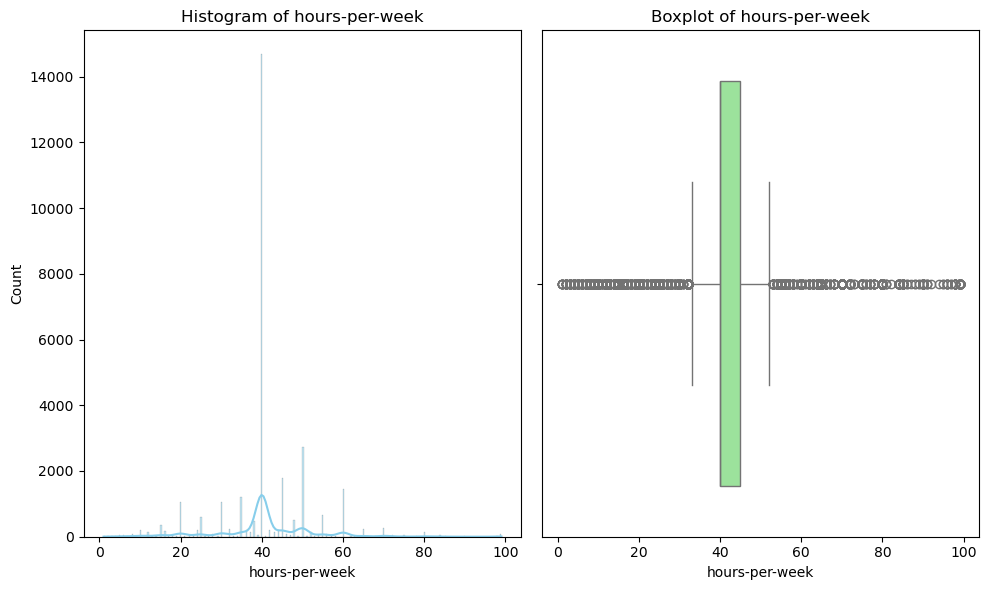

In [348]:
plot_distribution(df, 'hours-per-week')

In [269]:
pct = np.percentile(df.loc[:, 'age'].fillna(np.mean(df.loc[:, 'age'])), 95)
print(pct)
df = df.loc[df.loc[:, 'age'] < pct]

63.0


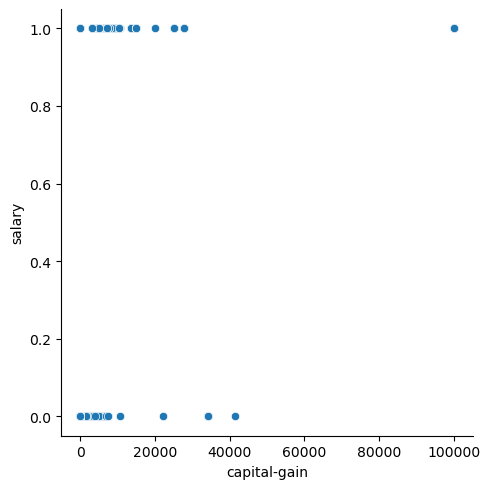

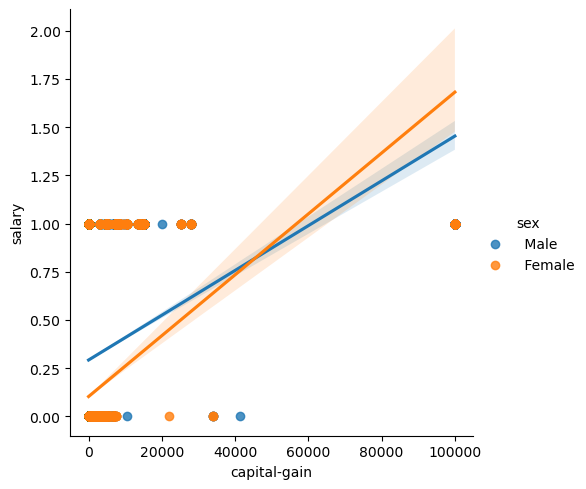

In [271]:
sns.relplot(x="capital-gain", y="salary", data=df)
sns.lmplot(x="capital-gain", y="salary", hue="sex", data=df);

### Drop rows

In [274]:
print(df.shape)
df = df.dropna(axis=1) #axis=0 is row, axis=1 is column
print(df.shape)

(30787, 15)
(30787, 15)


In [275]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

### Snipping 95% capital gain, loss

In [277]:
pct = np.percentile(df.loc[:, 'capital-loss'].fillna(np.mean(df.loc[:, 'capital-loss'])), 95)
print(pct)
#df = df.loc[df.loc[:, 'capital-gain'] < pct]

0.0


In [278]:
df.describe().round()
df.shape

(30787, 15)

### Select only numerical columns to make correlation matrix

   age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   salary  
0       0  
1       0  
2       0  
3       0  
4       0  
Numerical Columns:
['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


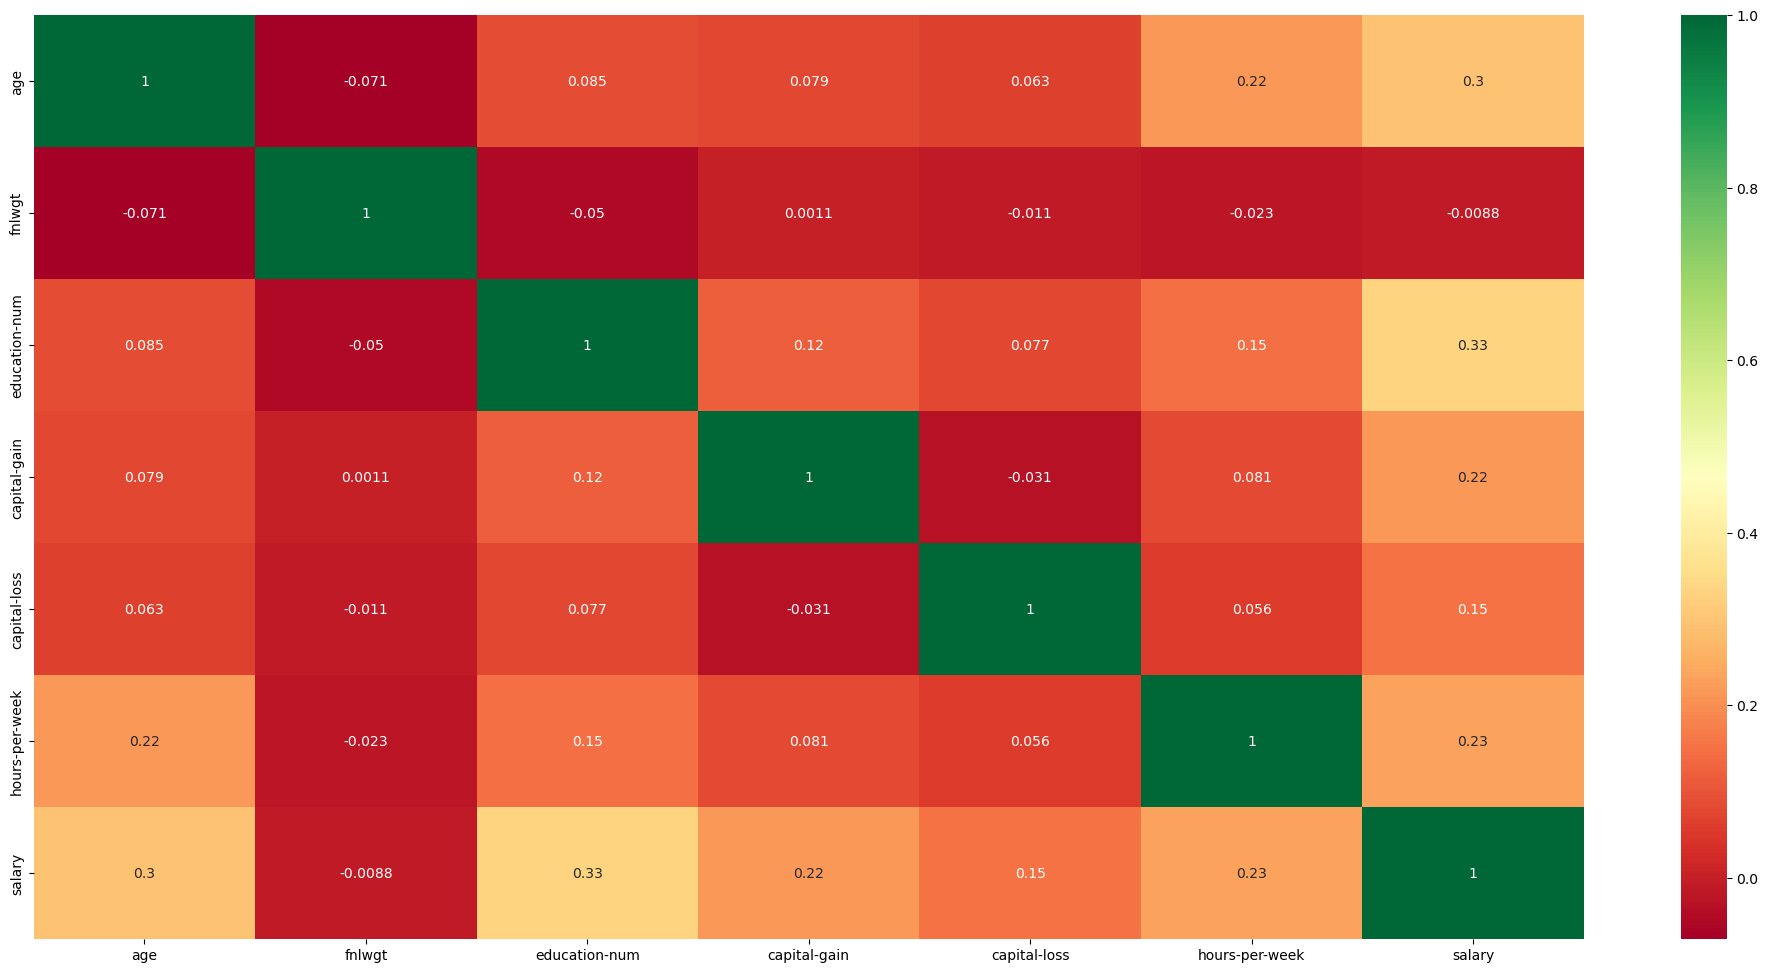

In [285]:
# Select only numerical columns to make correlation matrix

numerical_df = df.select_dtypes(include=[np.number])

numerical_cols = numerical_df.columns

print(numerical_df.head())

print("Numerical Columns:")
print(numerical_df.columns.tolist())
corrmat = numerical_df.corr()   #get correlations table
top_corr_features = corrmat.index
plt.figure(figsize=(25,12))
g=sns.heatmap(numerical_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")   #plot heat map

### For categorical to categorical

In [289]:
categorical_df = df.select_dtypes(include=['object'])
price_df = df['salary']

full_cat_frame = pd.concat([categorical_df, price_df], axis=1)

# Display the resulting DataFrame
print(full_cat_frame.head())

           workclass   education       marital-status          occupation  \
0          State-gov   Bachelors        Never-married        Adm-clerical   
1   Self-emp-not-inc   Bachelors   Married-civ-spouse     Exec-managerial   
2            Private     HS-grad             Divorced   Handlers-cleaners   
3            Private        11th   Married-civ-spouse   Handlers-cleaners   
4            Private   Bachelors   Married-civ-spouse      Prof-specialty   

     relationship    race      sex  native-country  salary  
0   Not-in-family   White     Male   United-States       0  
1         Husband   White     Male   United-States       0  
2   Not-in-family   White     Male   United-States       0  
3         Husband   Black     Male   United-States       0  
4            Wife   Black   Female            Cuba       0  


In [291]:
from scipy.stats import chi2_contingency

categorical_cols = [cname for cname in categorical_df.columns if categorical_df[cname].nunique() < 20 and categorical_df[cname].dtype == "object"]
target = df['salary']

# Initialize an empty dictionary to store feature and corresponding p-values
chi2_p_values = {}

# Chi-Square test for each categorical feature against the target variable
for column in categorical_df.columns:
    contingency_table = pd.crosstab(categorical_df[column], price_df)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_p_values[column] = p  # Store p-value in the dictionary

# Sort the dictionary based on p-values in ascending order
sorted_chi2_p_values = dict(sorted(chi2_p_values.items(), key=lambda item: item[1]))

# Display the sorted p-values
for feature, p_value in sorted_chi2_p_values.items():
    print(f"Feature: {feature}, p-value: {p_value:.4f}") 


Feature: education, p-value: 0.0000
Feature: marital-status, p-value: 0.0000
Feature: occupation, p-value: 0.0000
Feature: relationship, p-value: 0.0000
Feature: sex, p-value: 0.0000
Feature: workclass, p-value: 0.0000
Feature: race, p-value: 0.0000
Feature: native-country, p-value: 0.0000


In [80]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### for cat to continous target

In [293]:
from scipy.stats import f_oneway

# ANOVA test for each categorical feature against the target variable
for column in categorical_df.columns:
    feature_dict = {}
    categories = [full_cat_frame[full_cat_frame[column] == cat]['salary'] for cat in full_cat_frame[column].unique()]
    f_stat, p = f_oneway(*categories)
    feature_dict[column] = p
    print(f"Feature: {column}, p-value: {p}")

## Low p-value means significant assiciation with target

Feature: workclass, p-value: 9.665290750347518e-202
Feature: education, p-value: 0.0
Feature: marital-status, p-value: 0.0
Feature: occupation, p-value: 0.0
Feature: relationship, p-value: 0.0
Feature: race, p-value: 2.7920384394879152e-68
Feature: sex, p-value: 2.8927845e-317
Feature: native-country, p-value: 1.8706942712381217e-44


In [87]:
print(categorical_cols)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']


In [91]:
numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64'] and cname != 'salary']
numerical_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [356]:
#columns_drop = ['education', 'fnlwgt']

#df = df.drop(columns=columns_drop, axis=1)
#df.head()

df['gain-loss-sum'] = df['capital-gain'] - df['capital-loss']

df['is_married'] = ((df['relationship'] == 'Husband') | 
                    (df['relationship'] == 'Wife') | 
                    (df['marital-status'].str.contains('Married', case=True, na=False))).astype(int)

df['is_overworked'] = (df['hours-per-week'] > 40)

In [354]:
df.head(100)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,gain-loss-sum,is_married,is_overworked
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,2174,0,False
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,1,False
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0,False
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,1,False
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,1,0,1,True
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,0,0,0,False
99,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,0,0,0,False
101,44,Private,198282,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,60,United-States,1,15024,1,True


## Data Loading

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30787 entries, 0 to 32560
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30787 non-null  int64 
 1   workclass       30787 non-null  object
 2   fnlwgt          30787 non-null  int64 
 3   education       30787 non-null  object
 4   education-num   30787 non-null  int64 
 5   marital-status  30787 non-null  object
 6   occupation      30787 non-null  object
 7   relationship    30787 non-null  object
 8   race            30787 non-null  object
 9   sex             30787 non-null  object
 10  capital-gain    30787 non-null  int64 
 11  capital-loss    30787 non-null  int64 
 12  hours-per-week  30787 non-null  int64 
 13  native-country  30787 non-null  object
 14  salary          30787 non-null  int64 
 15  gain-loss-sum   30787 non-null  int64 
 16  is_married      30787 non-null  int32 
 17  is_overworked   30787 non-null  bool  
dtypes: bool(1),

In [360]:
# Separate target from predictors
y = df.salary
X = df.drop(['salary'], axis=1)

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]#, "string"]]# | X_train[cname].dtype == "bool")]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64'] and cname != 'salary']

# Keep selected columns only
#my_cols = categorical_cols + numerical_cols
#X_train = X_train_full[my_cols].copy()
#X_valid = X_valid_full[my_cols].copy()

In [362]:
numerical_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'gain-loss-sum']

In [364]:
categorical_cols

['workclass', 'marital-status', 'relationship', 'race', 'sex']

In [366]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gain-loss-sum,is_married,is_overworked
21007,61,Private,101265,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,43,United-States,0,0,True
10739,33,Private,80058,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,48,United-States,0,0,True
22306,53,Private,304353,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,36,United-States,0,1,False
30567,40,Private,168071,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,0,0,True
5545,21,Local-gov,38771,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0,0,False


In [368]:
X_valid.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,gain-loss-sum,is_married,is_overworked
19183,29,Private,106179,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,35,Canada,0,0,False
18991,24,Private,276851,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,1762,40,United-States,-1762,0,False
21589,44,Private,226129,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0,1,True
10789,34,Private,133503,Some-college,10,Divorced,Transport-moving,Not-in-family,White,Male,2174,0,40,United-States,2174,0,False
355,38,Federal-gov,95432,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,0,1,False


In [370]:
y_train.head()

21007    0
10739    0
22306    1
30567    0
5545     0
Name: salary, dtype: int64

In [372]:
y_valid.head()
y_valid.shape

(6158,)

#### The scoring function

In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [377]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestClassifier(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return accuracy_score(y_valid, preds)

## Instantiate pipeline

In [380]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

## Model

In [383]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [385]:
rf_model = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
rf_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', rf_model)
                             ])

# Preprocessing of training data, fit model 
rf_pipe.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = rf_pipe.predict(X_valid)

# Evaluate the model
score = accuracy_score(y_valid, preds)
print('Accuracy:', score)

Accuracy: 0.8514127963624554


In [387]:
score = recall_score(y_valid, preds)
print('Recall:', score)

Recall: 0.5972222222222222


In [389]:
cm = confusion_matrix(y_valid, preds)
cm

array([[4340,  306],
       [ 609,  903]], dtype=int64)

Confusion Matrix:
[[4340  306]
 [ 609  903]]


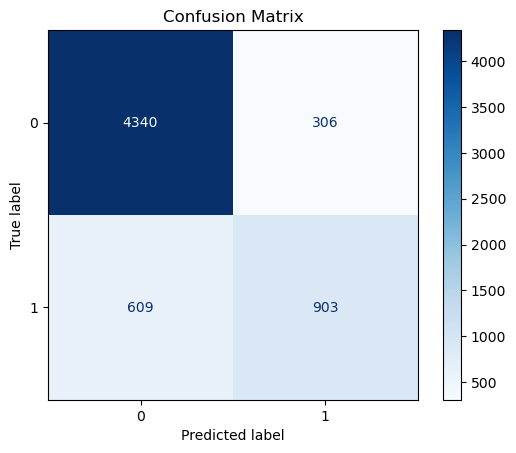

In [391]:
cm = confusion_matrix(y_valid, preds)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # You can choose other color maps like 'viridis', 'plasma', etc.
plt.title('Confusion Matrix')
plt.show()

In [396]:
TN, FP, FN, TP = cm.ravel()

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8514
Precision: 0.7469
Recall: 0.5972
F1 Score: 0.6637


### Feature Importance

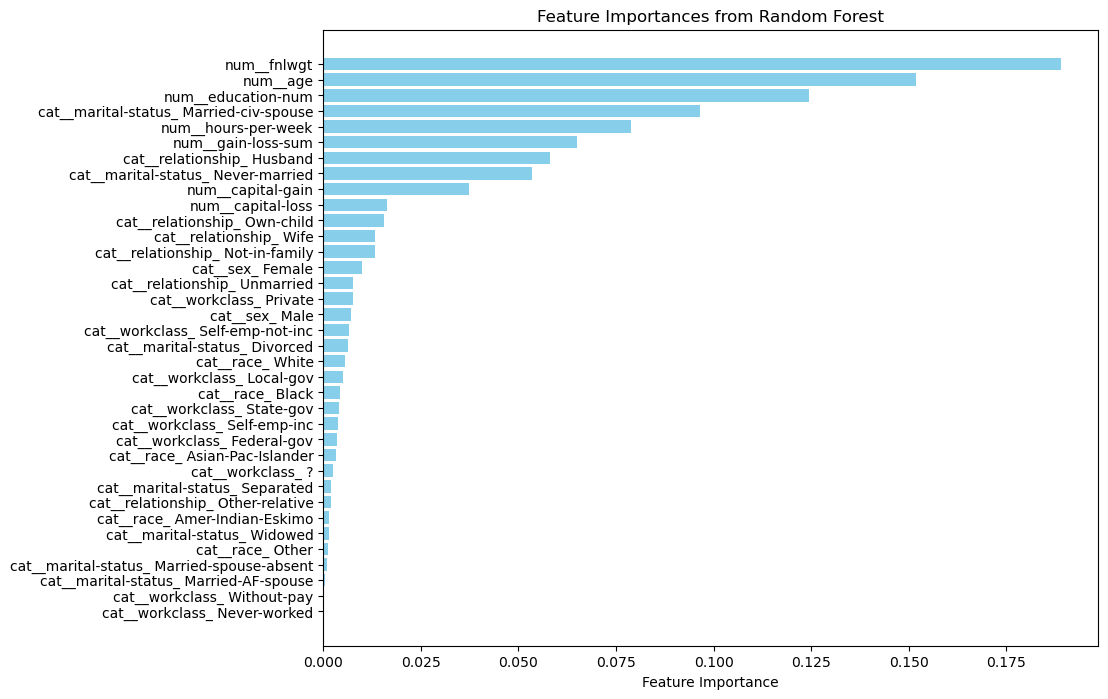

In [398]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names after preprocessing
feature_names = rf_pipe.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest importance at the top
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

### Adding more features

In [ ]:
# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]
